# Dataset Preparation & Analysis

## Import libraries
Import required libraries to run and access paramertized models, functions and complete project requirements. Ensure that sklearn, gensim, and nltk are installed on your machine.

In [1]:
import sklearn
import gensim
import nltk
import warnings
warnings.filterwarnings("ignore") # To suppress warning messages and keep interface clean

## Import and analyze dataset
Import required libraries to extract and split the dataset.

In [2]:
import gzip
import json
import numpy as np

Load the dataset and store in a numpy array for easier data manipulation.

In [3]:
file = json.load(gzip.open('goemotions.json.gz', 'r'))

data = np.asarray(file) # Store JSON file contents into a numpy array

Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf. This pre-analysis of the dataset will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifiers.

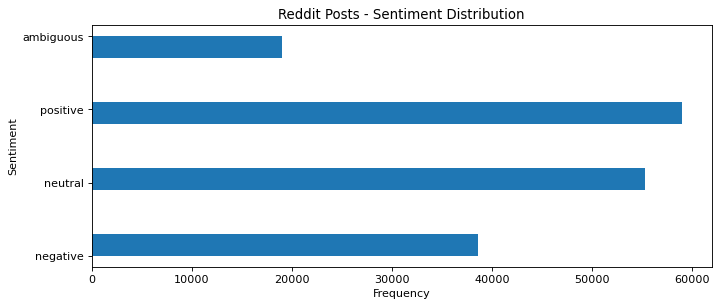

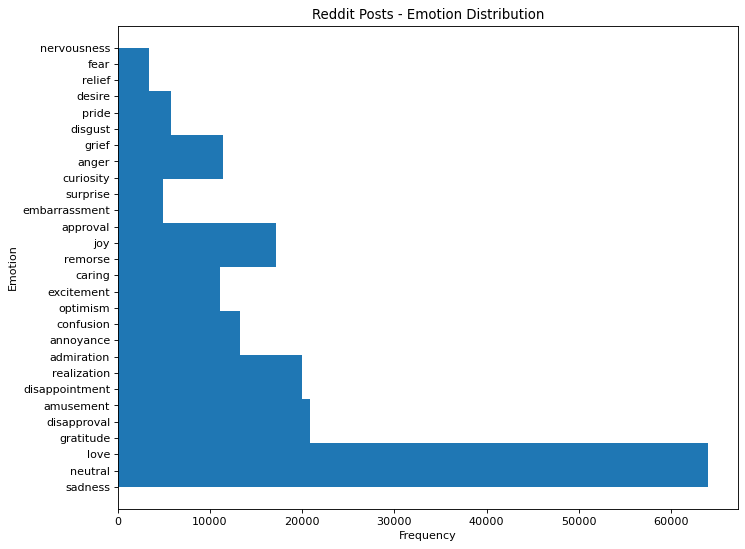

In [4]:
import matplotlib.pyplot as plt # Import matplotlib for graphing and data visualization

# Split data (features (X) and labels (y))
X_posts = data[:,0:1]
y_emotion = data[:,1:2]
y_sentiment = data[:,2:3]


# Sentiment Distribution
plt.figure(figsize=(10, 4), dpi=80)
plt.title('Reddit Posts - Sentiment Distribution')
plt.ylabel('Sentiment')
plt.xlabel('Frequency')
plt.hist(y_sentiment, orientation='horizontal')
plt.savefig('SentimentDistribution.pdf', dpi='figure')
plt.show()

# Emotion Distribution
plt.figure(figsize=(10, 8), dpi=80)
plt.title('Reddit Posts - Emotion Distribution')
plt.ylabel('Emotion')
plt.xlabel('Frequency')
plt.hist(y_emotion, orientation='horizontal')
plt.savefig('EmotionDistribution.pdf', dpi='figure')
plt.show()

## Import Pre-Trained Model
Use gensim.downloader.load to load the word2vec-google-news-300 pretrained embedding model

In [5]:
from gensim.downloader import load


# TASK 3.1
model = load("word2vec-google-news-300")

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.6% 60.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.5% 91.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.4% 123.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 10.3% 171.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.7% 228.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.6% 260.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 18.0% 298.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 22.0% 365.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.5% 407.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.5% 473.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.1% 533.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.3% 586.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.3% 636.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.7% 692.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.8% 744.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.9% 796.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.4% 854.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.6% 908.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.3% 969.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.9% 1030.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.8% 1076.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.6% 1123.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.9% 1178.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.2% 1233.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.1% 1282.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.4% 1337.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.6% 1389.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.2% 1466.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.0% 1513.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.1% 1565.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 97.3% 1618.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


# Splitting the dataset

Next up, we will split the inputs and labels into training and test sets, 80% and 20% respectively.

In [6]:
from sklearn.model_selection import train_test_split


training_dataset, testing_dataset = train_test_split(np.array(data), test_size=0.2)

# Tokenizing

In [8]:
import nltk
nltk.download('punkt')

# nltk.download('punkt')

# Split data (features (X) and labels (y))
X_posts_train, X_posts_test = [x[0] for x in training_dataset], [x[0] for x in testing_dataset]
y_emotion_train, y_emotion_test = [x[1] for x in training_dataset], [x[1] for x in testing_dataset]
y_sentiment_train, y_sentiment_test = [x[2] for x in training_dataset], [x[2] for x in testing_dataset]

# tokenize the data
tokenized_X_posts_train, tokenized_X_posts_test = [nltk.word_tokenize(x) for x in X_posts_train], [nltk.word_tokenize(x) for x in X_posts_test]

# TASK 3.2
print("Number of tokens: {}".format(sum([len(tokenized_post) for tokenized_post in tokenized_X_posts_train])))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Julie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Number of tokens: 2113738


## Word2Vec

In [19]:
def sanitized_tokens(tokenized_post):
    return [token for token in tokenized_post if token in model.key_to_index]


# Return a list of the avg. (np.mean)
def embedding_of_reddit_post(tokenized_post):
    return [np.mean(model[token], axis=0) for token in sanitized_tokens(tokenized_post)]


# Apply embedding for all posts and return it as a list.
embedding_of_reddit_posts = [embedding_of_reddit_post(X_post) for X_post in tokenized_X_posts_train]

# TASK 3.3
print("Showing the embedding for the first 5 posts:\n", embedding_of_reddit_posts[:5])

X_avgemb_train = sum(embedding_of_reddit_post(X_posts_train))/len(embedding_of_reddit_post(X_posts_train))

X_avgemb_test = sum(embedding_of_reddit_post(X_posts_test))/len(embedding_of_reddit_post(X_posts_test))



Showing the embedding for the first 5 posts:
 [[0.0013490216, 0.013772164, -0.00430329, -0.0076252557, 0.0022961616, -0.0025180054, 0.00038683575, 0.0021752485, -0.012123661, -0.009880113, 0.0065924707, -0.008871352, -0.018289821], [0.003150444, 0.0051629823, -0.012123661, -0.016299985, 0.0022961616, 0.008388621, -0.011278242, -0.0027225495, -0.005335312], [0.007609914, -0.0010872396, -0.0042676544, 0.013772164, 0.0023159822, -0.009204419, -0.017666053, -0.012776247, 0.009505139, 0.00067667646, -0.0059165047, -0.0076252557, -0.003791682, 0.007924143, -0.010231285, -0.0042676544, 0.0031209183, -0.0035297775, -0.0034552256, -0.0036160604, -0.0060370825], [-0.00038301706, 0.008995845, 0.009505139, -0.0062039113, 0.0029325103, -0.0031119282, 0.001360836, -0.0054405816, -0.00430329, -0.009589386, -0.007294502, 0.007226054, -0.0032711283, -0.012726339, -0.00430329, 0.000937144, 0.0028410133, -0.021852544, -0.0016911825, 0.0049603716, -0.0057016755, 0.013772164, -0.00023369631, 0.017919248], 

Compute and display the overall hit rates of the training and test sets.

In [17]:
# TASK 3.4
def hit_rate(tokenized_post):
    return len(sanitized_tokens(tokenized_post)) / len(tokenized_post) * 100


hit_rate_train, hit_rate_test = [
    hit_rate(post) for post in tokenized_X_posts_train
], [hit_rate(post) for post in tokenized_X_posts_test]

print("{} \nOverall train set accuracy: {:0.2f}%".format("-" * 40, (sum(hit_rate_train) / len(hit_rate_train))))
print("Overall test set accuracy: {:0.2f}%\n{}".format((sum(hit_rate_test) / len(hit_rate_test)), "-" * 40))

print("Showing first 5 individual train set hit rate:\n", hit_rate_train[:5])
print("Showing first 5 individual test set hit rate:\n", hit_rate_test[:5])

---------------------------------------- 
Overall train set accuracy: 77.32%
Overall test set accuracy: 77.32%
----------------------------------------
Showing first 5 individual train set hit rate:
 [92.85714285714286, 90.0, 77.77777777777779, 75.0, 80.0]
Showing first 5 individual test set hit rate:
 [100.0, 75.0, 66.66666666666666, 80.0, 87.5]


# Base Multi-Layered Perceptron Classifier

Here we will train a base multi-layered perceptron classifier with the default parameters selected.

In [24]:
def averageAllPosts(all_reviews):
    avg_all_reviews = []
    count = 0
    for review in all_reviews:
        if count == 0 :
            count += 1
            avg_all_reviews = np.array([averageEach(review)])
        else: avg_all_reviews = np.vstack((avg_all_reviews,averageEach(review))) 
    return avg_all_reviews

def averageEach(post_string):
    avg_each_review = np.array([0] * 300).reshape(300)
    counter = 0
    for word in post_string.split():
        if word in model: 
            counter = counter + 1
            avg_each_review = avg_each_review + model[word]
    
    if counter != 0:
        avg_each_review = avg_each_review/counter

    return avg_each_review

In [33]:
#average post_train and post_test data sets using word2vec
embed_post_train = averageAllPosts(X_posts_train[:1000])
embed_post_testing = averageAllPosts(X_posts_test[:1000])


The performance of Multilayer Perceptron with default parameters for emotions.

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00        52
     amusement       0.00      0.00      0.00        35
         anger       0.00      0.00      0.00        27
     annoyance       0.00      0.00      0.00        47
      approval       0.00      0.00      0.00        56
        caring       0.00      0.00      0.00        24
     confusion       0.00      0.00      0.00        28
     curiosity       0.00      0.00      0.00        42
        desire       0.00      0.00      0.00         6
disappointment       0.00      0.00      0.00        29
   disapproval       0.00      0.00      0.00        38
       disgust       0.00      0.00      0.00        11
 embarrassment       0.00      0.00      0.00         9
    excitement       0.00      0.00      0.00        18
          fear       0.00      0.00      0.00        10
     gratitude       0.

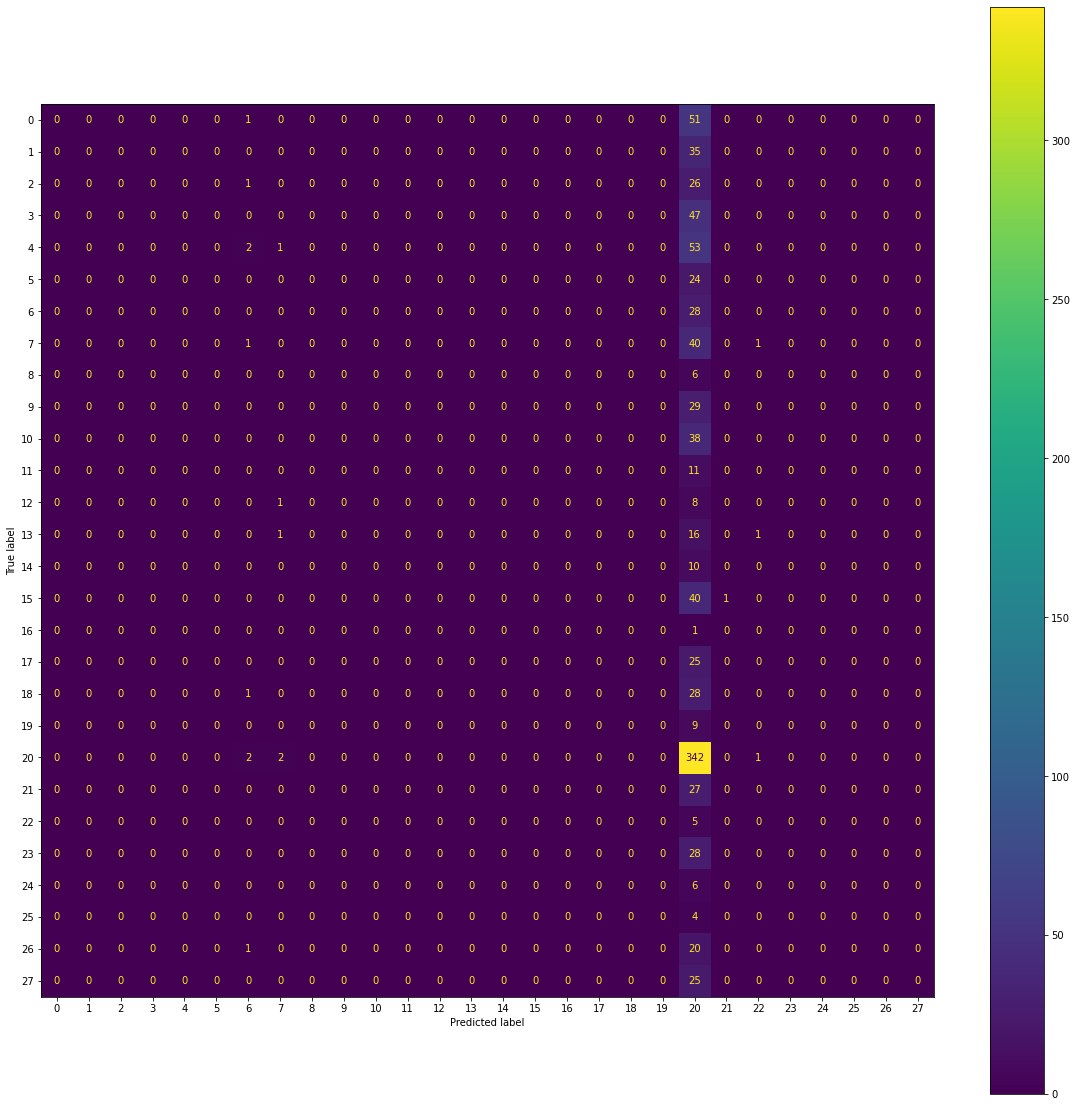

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 

baseMLP_model = MLPClassifier(max_iter=1) 
baseMLP_model.fit(embed_post_train,y_emotion_train[:1000]) #Training step #change variable names later

pred = baseMLP_model.predict(embed_post_testing) #change variable names later

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(y_emotion_test[:1000], pred)) #change variable names later
cm = confusion_matrix(y_emotion_test[:1000], pred) #change variable names later
disp = ConfusionMatrixDisplay(cm) #change variable names later
fig, ax = plt.subplots(figsize=(20, 20)) 
disp.plot(ax = ax) 
plt.show()

The performance of Multilayer Perceptron with default parameters for sentiment.

              precision    recall  f1-score   support

   ambiguous       0.09      0.15      0.12       123
    negative       0.21      0.02      0.04       206
     neutral       0.21      0.01      0.02       347
    positive       0.35      0.83      0.49       324

    accuracy                           0.29      1000
   macro avg       0.22      0.25      0.17      1000
weighted avg       0.24      0.29      0.19      1000



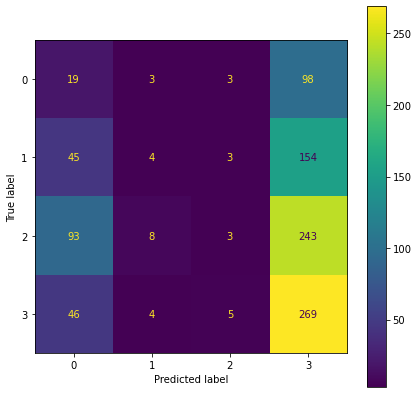

In [37]:
# Sentiment Classification 


baseMLP_model = MLPClassifier(max_iter=1)
baseMLP_model.fit(embed_post_train,y_sentiment_train[:1000])

pred = baseMLP_model.predict(embed_post_testing)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(y_sentiment_test[:1000], pred)) 
cm = confusion_matrix(y_sentiment_test[:1000], pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) 
disp.plot(ax = ax) 
plt.show()

# Top Multi-Layered Perceptron Classifier

A better performing multi-layered perceptron found using GridSearchCV.

In [38]:
from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters
MLP_model = MLPClassifier(max_iter=1)
hyper_parameters = {'activation':('logistic','tanh','relu','identity'),
                    'solver':('sgd', 'adam'), 'hidden_layer_sizes':((10,10,10),(30,50))}

gridSearchMLP = GridSearchCV(MLP_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMLP.fit(embed_post_train, y_emotion_train[:1000])
print('[EMOTION] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMLP.fit(embed_post_train, y_sentiment_train[:1000])
print('[SENTIMENT] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)

[EMOTION] Best Hyperparameter Configuration: {'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
[SENTIMENT] Best Hyperparameter Configuration: {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


The performance of Multilayer Perceptron .

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00        52
     amusement       0.00      0.00      0.00        35
         anger       0.00      0.00      0.00        27
     annoyance       0.00      0.00      0.00        47
      approval       0.00      0.00      0.00        56
        caring       0.00      0.00      0.00        24
     confusion       0.00      0.00      0.00        28
     curiosity       0.00      0.00      0.00        42
        desire       0.00      0.00      0.00         6
disappointment       0.00      0.00      0.00        29
   disapproval       0.00      0.00      0.00        38
       disgust       0.00      0.00      0.00        11
 embarrassment       0.01      0.78      0.02         9
    excitement       0.04      0.39      0.07        18
          fear       0.00      0.00      0.00        10
     gratitude       0.00      0.00      0.00        41
   

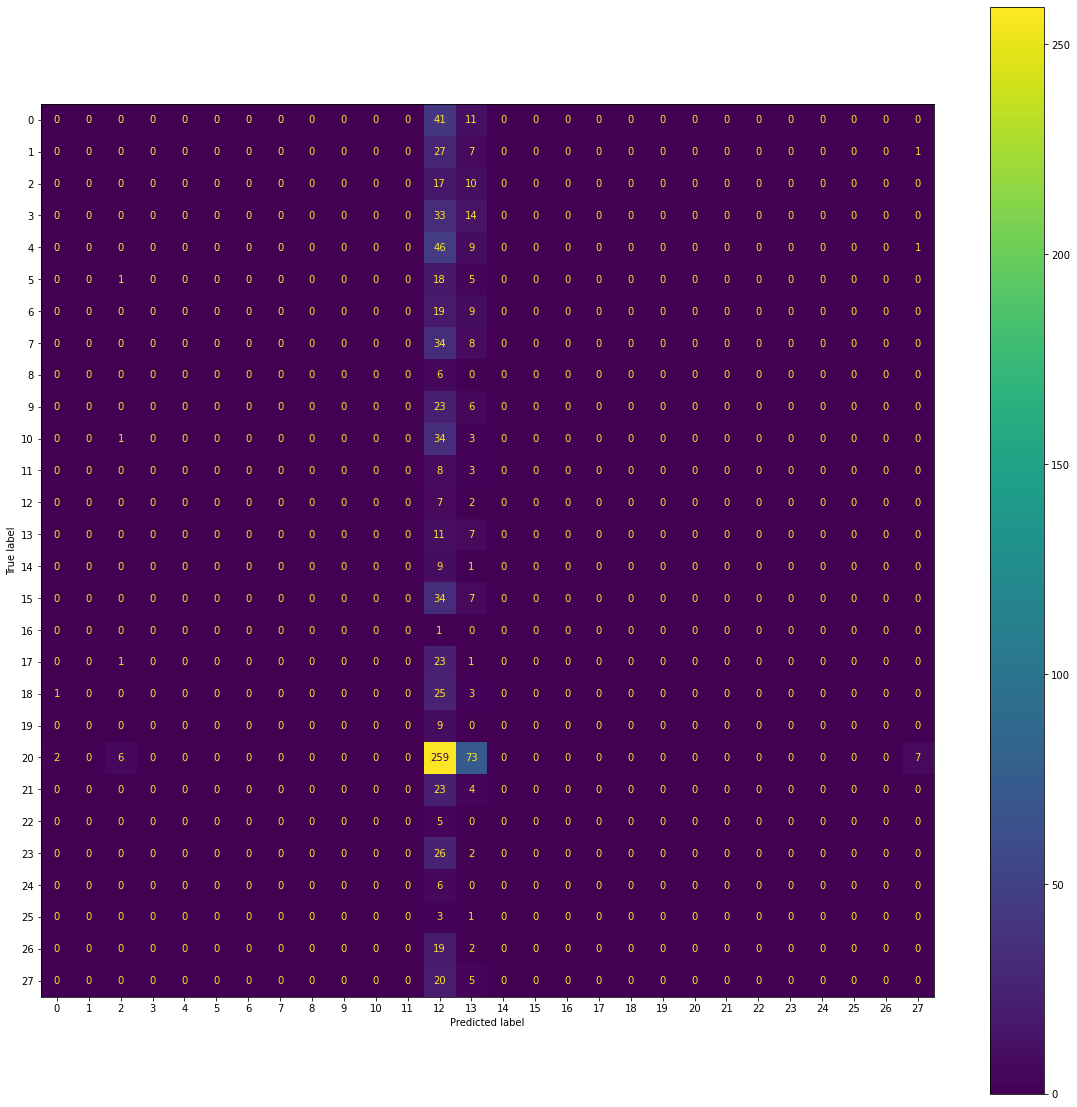

The performance of Multilayer Perceptron with default parameters for sentiment.

              precision    recall  f1-score   support

   ambiguous       0.09      0.15      0.12       123
    negative       0.21      0.02      0.04       206
     neutral       0.21      0.01      0.02       347
    positive       0.35      0.83      0.49       324

    accuracy                           0.29      1000
   macro avg       0.22      0.25      0.17      1000
weighted avg       0.24      0.29      0.19      1000



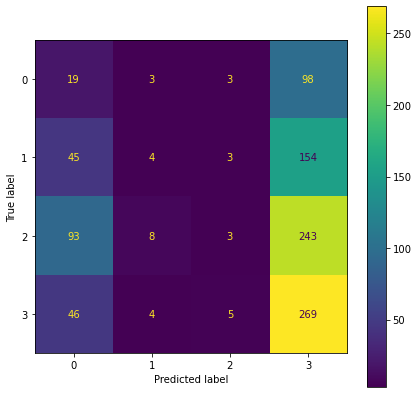

In [45]:
# Emotion Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='relu', solver='adam')
topMLP_model.fit(embed_post_train, y_emotion_train[:1000]) # Training step


pred = topMLP_model.predict(embed_post_testing)

print("The performance of Multilayer Perceptron .\n")
print(classification_report(y_emotion_test[:1000], pred)) #change variable names later
cm = confusion_matrix(y_emotion_test[:1000], pred) #change variable names later
disp = ConfusionMatrixDisplay(cm) #change variable names later
fig, ax = plt.subplots(figsize=(20, 20)) 
disp.plot(ax = ax) 
plt.show()

# Sentiment Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='identity', solver='adam')
topMLP_model.fit(embed_post_train, y_sentiment_train[:1000]) # Training step
pred = baseMLP_model.predict(embed_post_testing)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(y_sentiment_test[:1000], pred)) 
cm = confusion_matrix(y_sentiment_test[:1000], pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) 
disp.plot(ax = ax) 
plt.show()

# Embedding - glove-twitter-100

The performance of Multilayer Perceptron with default parameters for emotions.

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00        52
     amusement       0.00      0.00      0.00        35
         anger       0.33      0.04      0.07        27
     annoyance       0.04      0.57      0.08        47
      approval       0.00      0.00      0.00        56
        caring       0.00      0.00      0.00        24
     confusion       0.00      0.00      0.00        28
     curiosity       0.00      0.00      0.00        42
        desire       0.00      0.00      0.00         6
disappointment       0.00      0.00      0.00        29
   disapproval       0.00      0.00      0.00        38
       disgust       0.00      0.00      0.00        11
 embarrassment       0.00      0.00      0.00         9
    excitement       0.00      0.00      0.00        18
          fear       0.00      0.00      0.00        10
     gratitude       0.

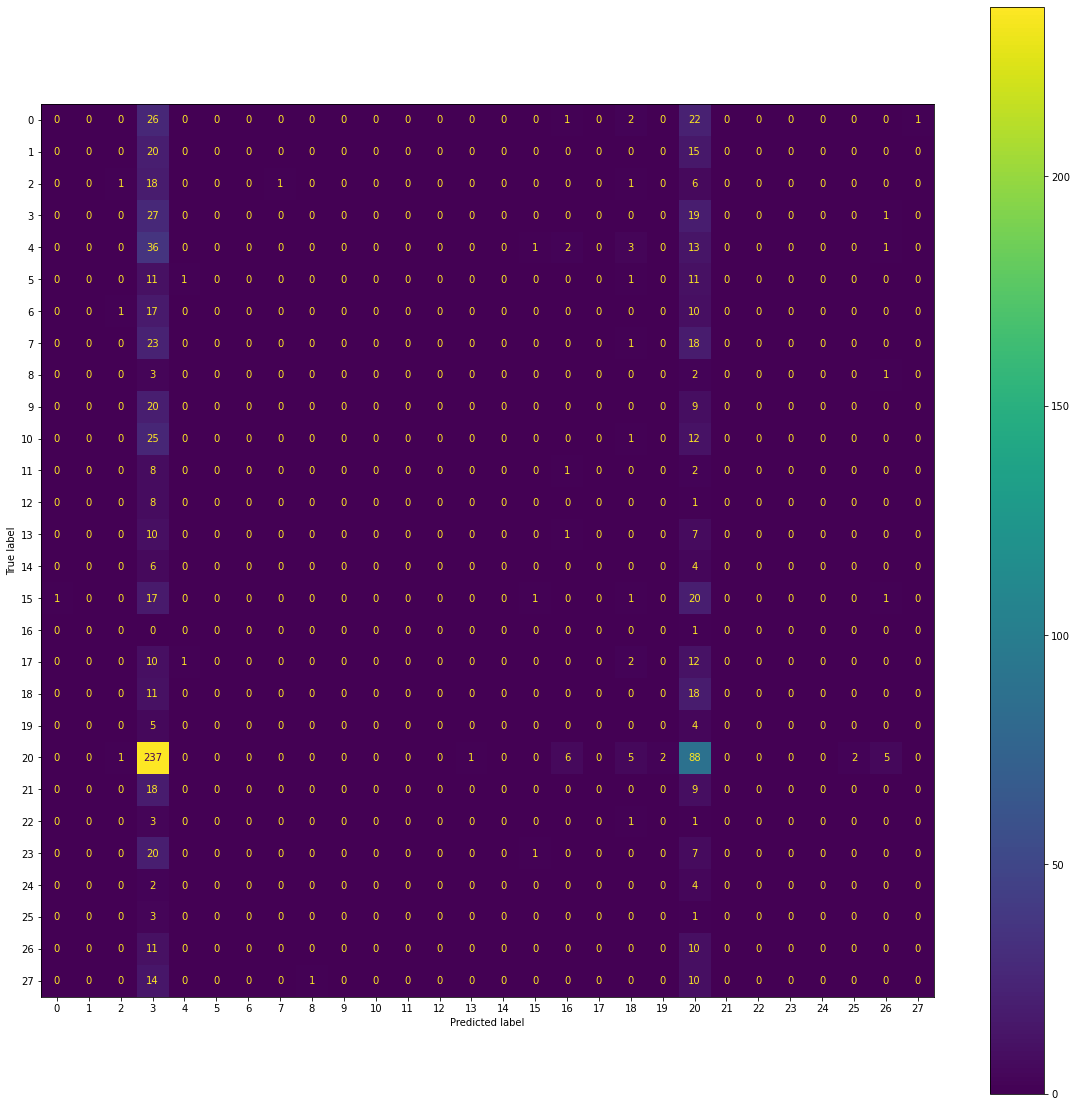

The performance of Multilayer Perceptron with default parameters for sentiment.

              precision    recall  f1-score   support

   ambiguous       0.06      0.02      0.03       123
    negative       0.30      0.01      0.03       206
     neutral       0.51      0.06      0.11       347
    positive       0.33      0.93      0.49       324

    accuracy                           0.33      1000
   macro avg       0.30      0.26      0.17      1000
weighted avg       0.36      0.33      0.21      1000



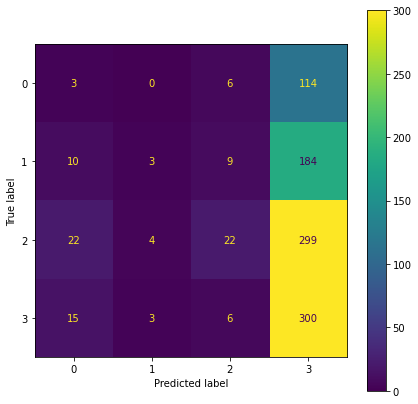

[EMOTION] Best Hyperparameter Configuration: {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'sgd'}
[SENTIMENT] Best Hyperparameter Configuration: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


from gensim.downloader import load

model = load("glove-twitter-100")


def averageAllPosts(all_reviews):
    avg_all_reviews = []
    count = 0
    for review in all_reviews:
        if count == 0 :
            count += 1
            avg_all_reviews = np.array([averageEach(review)])
        else: avg_all_reviews = np.vstack((avg_all_reviews,averageEach(review))) 
    return avg_all_reviews

def averageEach(post_string):
    avg_each_review = np.array([0] * 100).reshape(100)
    counter = 0
    for word in post_string.split():
        if word in model: 
            counter = counter + 1
            avg_each_review = avg_each_review + model[word]
    
    if counter != 0:
        avg_each_review = avg_each_review/counter

    return avg_each_review

#average post_train and post_test data sets using word2vec
embed_post_train = averageAllPosts(X_posts_train[:1000])
embed_post_testing = averageAllPosts(X_posts_test[:1000])
# print(embed_post_testing)
# print(post_train.size)
# Emotion Classification 

baseMLP_model = MLPClassifier(max_iter=1) 
baseMLP_model.fit(embed_post_train,y_emotion_train[:1000]) #Training step #change variable names later

pred = baseMLP_model.predict(embed_post_testing) #change variable names later

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(y_emotion_test[:1000], pred)) #change variable names later
cm = confusion_matrix(y_emotion_test[:1000], pred) #change variable names later
disp = ConfusionMatrixDisplay(cm) #change variable names later
fig, ax = plt.subplots(figsize=(20, 20)) 
disp.plot(ax = ax) 
plt.show()

# Sentiment Classification 


baseMLP_model = MLPClassifier(max_iter=1)
baseMLP_model.fit(embed_post_train,y_sentiment_train[:1000])

pred = baseMLP_model.predict(embed_post_testing)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(y_sentiment_test[:1000], pred)) 
cm = confusion_matrix(y_sentiment_test[:1000], pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) 
disp.plot(ax = ax) 
plt.show()


# top mlp 

from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters
MLP_model = MLPClassifier(max_iter=1)
hyper_parameters = {'activation':('logistic','tanh','relu','identity'),
                    'solver':('sgd', 'adam'), 'hidden_layer_sizes':((10,10,10),(30,50))}

gridSearchMLP = GridSearchCV(MLP_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMLP.fit(embed_post_train, y_emotion_train[:1000])
print('[EMOTION] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMLP.fit(embed_post_train, y_sentiment_train[:1000])
print('[SENTIMENT] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)



Emotion : The performance of top Multilayer Perceptron .

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00        52
     amusement       0.04      0.03      0.03        35
         anger       0.00      0.00      0.00        27
     annoyance       0.00      0.00      0.00        47
      approval       0.00      0.00      0.00        56
        caring       0.00      0.00      0.00        24
     confusion       0.00      0.00      0.00        28
     curiosity       0.00      0.00      0.00        42
        desire       0.00      0.00      0.00         6
disappointment       0.00      0.00      0.00        29
   disapproval       0.00      0.00      0.00        38
       disgust       0.00      0.00      0.00        11
 embarrassment       0.00      0.00      0.00         9
    excitement       0.00      0.00      0.00        18
          fear       0.01      0.10      0.02        10
     gratitude       0.05      0.51      0.09

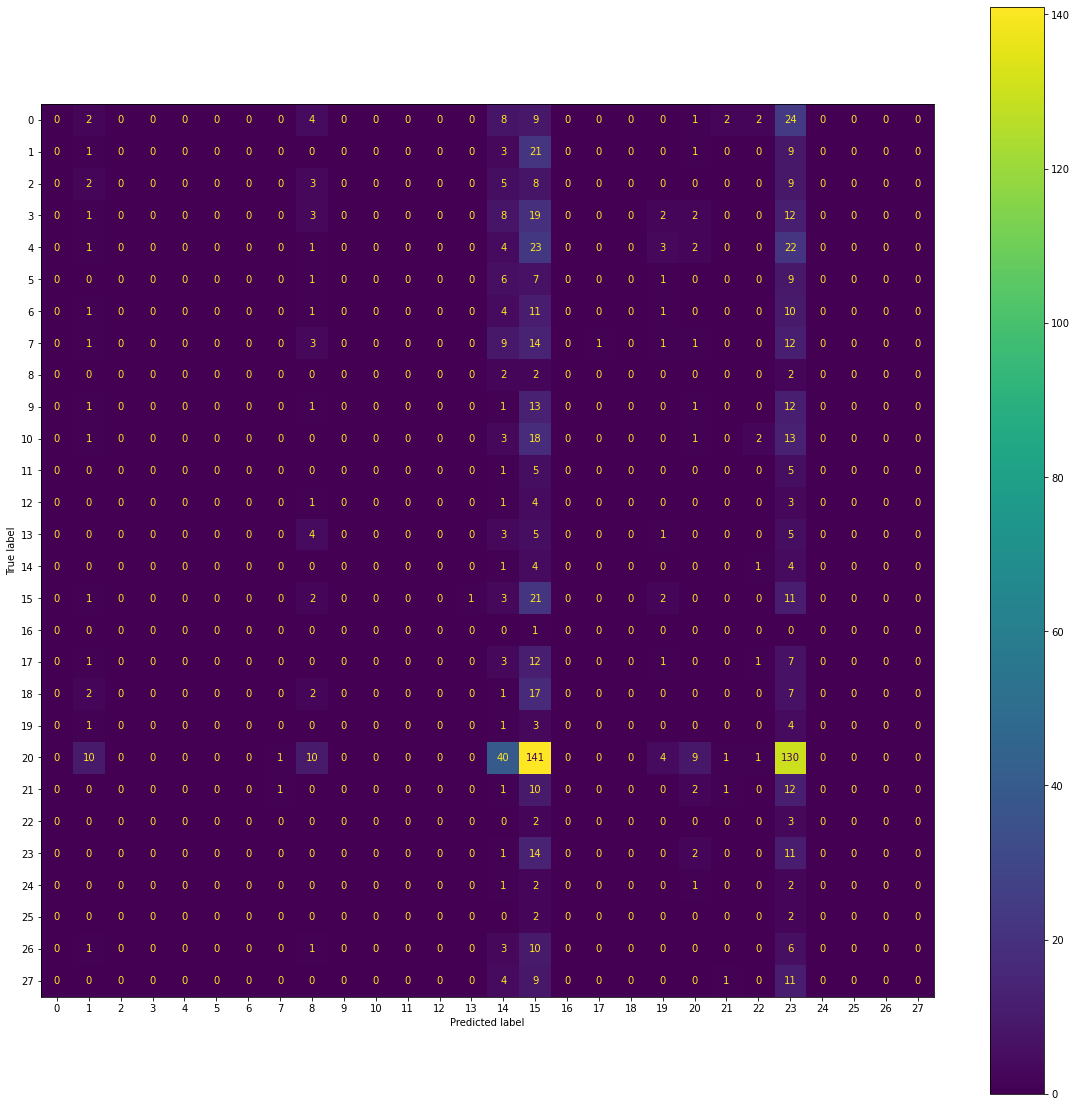

Sentiment : The performance of Top Multilayer Perceptron.

              precision    recall  f1-score   support

   ambiguous       0.06      0.02      0.03       123
    negative       0.30      0.01      0.03       206
     neutral       0.51      0.06      0.11       347
    positive       0.33      0.93      0.49       324

    accuracy                           0.33      1000
   macro avg       0.30      0.26      0.17      1000
weighted avg       0.36      0.33      0.21      1000



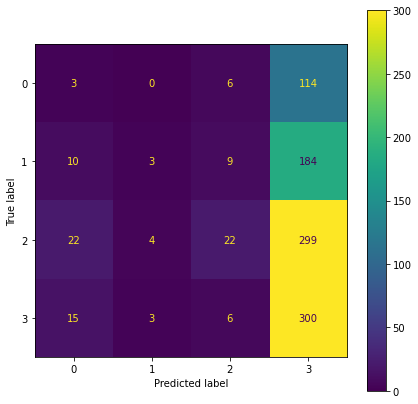

In [52]:
#top models 

# Emotion Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='identity', solver='sgd')
topMLP_model.fit(embed_post_train, y_emotion_train[:1000]) # Training step


pred = topMLP_model.predict(embed_post_testing)

print("Emotion : The performance of top Multilayer Perceptron .\n")
print(classification_report(y_emotion_test[:1000], pred)) #change variable names later
cm = confusion_matrix(y_emotion_test[:1000], pred) #change variable names later
disp = ConfusionMatrixDisplay(cm) #change variable names later
fig, ax = plt.subplots(figsize=(20, 20)) 
disp.plot(ax = ax) 
plt.show()

# Sentiment Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='tanh', solver='adam')
topMLP_model.fit(embed_post_train, y_sentiment_train[:1000]) # Training step
pred = baseMLP_model.predict(embed_post_testing)

print("Sentiment : The performance of Top Multilayer Perceptron.\n")
print(classification_report(y_sentiment_test[:1000], pred)) 
cm = confusion_matrix(y_sentiment_test[:1000], pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) 
disp.plot(ax = ax) 
plt.show()

# Embedding - glove-wiki-gigaword-300

The performance of Multilayer Perceptron with default parameters for emotions.

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00        52
     amusement       0.00      0.00      0.00        35
         anger       0.00      0.00      0.00        27
     annoyance       0.00      0.00      0.00        47
      approval       0.00      0.00      0.00        56
        caring       0.00      0.00      0.00        24
     confusion       0.00      0.00      0.00        28
     curiosity       0.00      0.00      0.00        42
        desire       0.00      0.00      0.00         6
disappointment       0.00      0.00      0.00        29
   disapproval       0.00      0.00      0.00        38
       disgust       0.00      0.00      0.00        11
 embarrassment       0.00      0.00      0.00         9
    excitement       0.00      0.00      0.00        18
          fear       0.00      0.00      0.00        10
     gratitude       0.

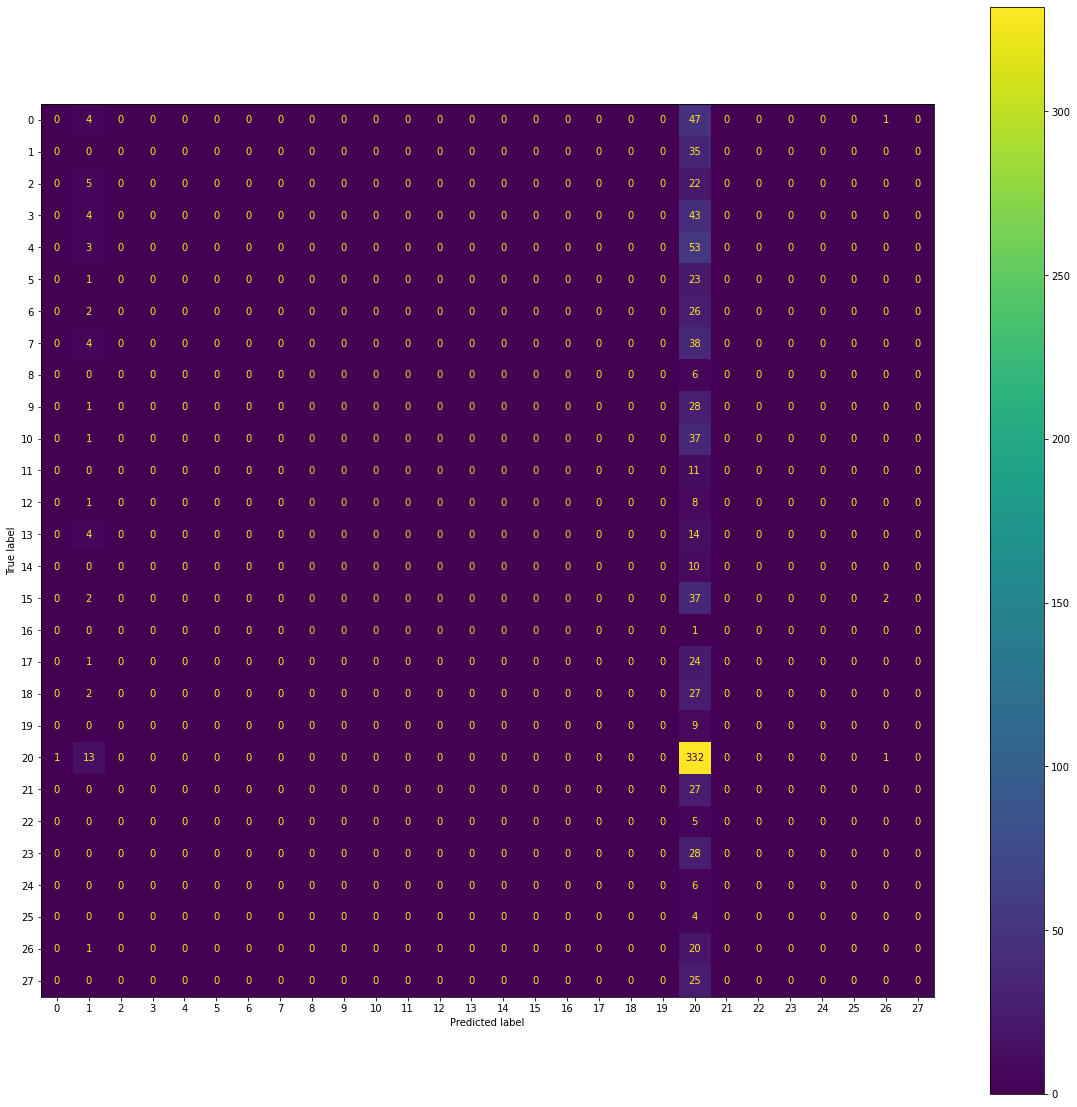

The performance of Multilayer Perceptron with default parameters for sentiment.

              precision    recall  f1-score   support

   ambiguous       0.13      0.02      0.03       123
    negative       0.23      0.10      0.14       206
     neutral       0.37      0.55      0.44       347
    positive       0.36      0.41      0.38       324

    accuracy                           0.35      1000
   macro avg       0.27      0.27      0.25      1000
weighted avg       0.31      0.35      0.31      1000



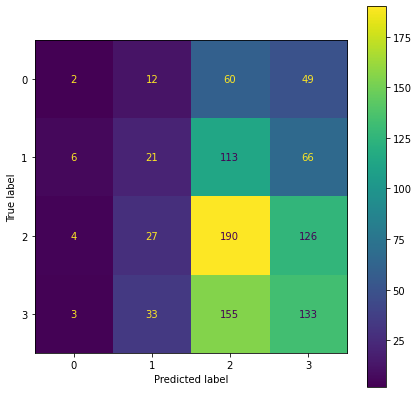

[EMOTION] Best Hyperparameter Configuration: {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
[SENTIMENT] Best Hyperparameter Configuration: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from gensim.downloader import load

model = load("glove-wiki-gigaword-300")


def averageAllPosts(all_reviews):
    avg_all_reviews = []
    count = 0
    for review in all_reviews:
        if count == 0 :
            count += 1
            avg_all_reviews = np.array([averageEach(review)])
        else: avg_all_reviews = np.vstack((avg_all_reviews,averageEach(review))) 
    return avg_all_reviews

def averageEach(post_string):
    avg_each_review = np.array([0] * 300).reshape(300)
    counter = 0
    for word in post_string.split():
        if word in model: 
            counter = counter + 1
            avg_each_review = avg_each_review + model[word]
    
    if counter != 0:
        avg_each_review = avg_each_review/counter

    return avg_each_review


#average post_train and post_test data sets using word2vec
embed_post_train = averageAllPosts(X_posts_train[:1000])
embed_post_testing = averageAllPosts(X_posts_test[:1000])
# print(embed_post_testing)
# print(post_train.size)
# Emotion Classification 

baseMLP_model = MLPClassifier(max_iter=1) 
baseMLP_model.fit(embed_post_train,y_emotion_train[:1000]) #Training step #change variable names later

pred = baseMLP_model.predict(embed_post_testing) #change variable names later

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(y_emotion_test[:1000], pred)) #change variable names later
cm = confusion_matrix(y_emotion_test[:1000], pred) #change variable names later
disp = ConfusionMatrixDisplay(cm) #change variable names later
fig, ax = plt.subplots(figsize=(20, 20)) 
disp.plot(ax = ax) 
plt.show()

# Sentiment Classification 


baseMLP_model = MLPClassifier(max_iter=1)
baseMLP_model.fit(embed_post_train,y_sentiment_train[:1000])

pred = baseMLP_model.predict(embed_post_testing)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(y_sentiment_test[:1000], pred)) 
cm = confusion_matrix(y_sentiment_test[:1000], pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) 
disp.plot(ax = ax) 
plt.show()


# top mlp 

from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters
MLP_model = MLPClassifier(max_iter=1)
hyper_parameters = {'activation':('logistic','tanh','relu','identity'),
                    'solver':('sgd', 'adam'), 'hidden_layer_sizes':((10,10,10),(30,50))}

gridSearchMLP = GridSearchCV(MLP_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMLP.fit(embed_post_train, y_emotion_train[:1000])
print('[EMOTION] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMLP.fit(embed_post_train, y_sentiment_train[:1000])
print('[SENTIMENT] Best Hyperparameter Configuration:', gridSearchMLP.best_params_)


The performance of Multilayer Perceptron .

                precision    recall  f1-score   support

    admiration       1.00      0.02      0.04        52
     amusement       0.00      0.00      0.00        35
         anger       0.33      0.04      0.07        27
     annoyance       0.00      0.00      0.00        47
      approval       0.00      0.00      0.00        56
        caring       0.00      0.00      0.00        24
     confusion       0.00      0.00      0.00        28
     curiosity       0.00      0.00      0.00        42
        desire       0.00      0.00      0.00         6
disappointment       0.00      0.00      0.00        29
   disapproval       0.00      0.00      0.00        38
       disgust       0.00      0.00      0.00        11
 embarrassment       0.00      0.00      0.00         9
    excitement       0.00      0.00      0.00        18
          fear       0.00      0.00      0.00        10
     gratitude       0.00      0.00      0.00        41
   

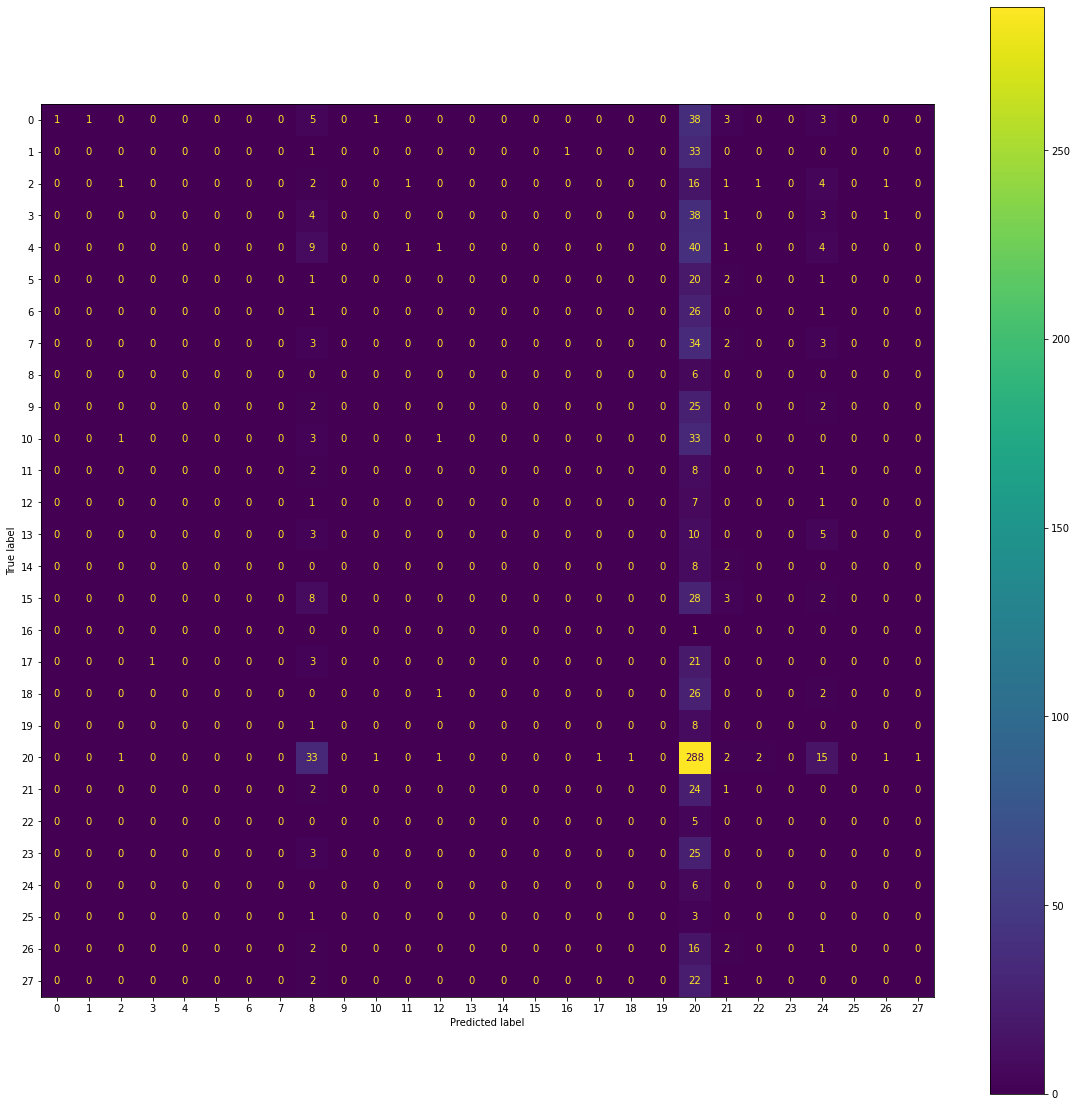

The performance of Multilayer Perceptron with default parameters for sentiment.

              precision    recall  f1-score   support

   ambiguous       0.13      0.02      0.03       123
    negative       0.23      0.10      0.14       206
     neutral       0.37      0.55      0.44       347
    positive       0.36      0.41      0.38       324

    accuracy                           0.35      1000
   macro avg       0.27      0.27      0.25      1000
weighted avg       0.31      0.35      0.31      1000



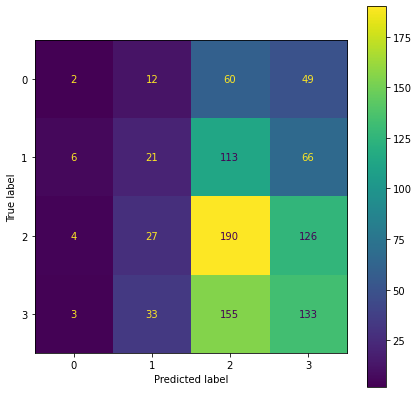

In [55]:
# Emotion Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='identity', solver='adam')
topMLP_model.fit(embed_post_train, y_emotion_train[:1000]) # Training step


pred = topMLP_model.predict(embed_post_testing)

print("The performance of Multilayer Perceptron .\n")
print(classification_report(y_emotion_test[:1000], pred)) #change variable names later
cm = confusion_matrix(y_emotion_test[:1000], pred) #change variable names later
disp = ConfusionMatrixDisplay(cm) #change variable names later
fig, ax = plt.subplots(figsize=(20, 20)) 
disp.plot(ax = ax) 
plt.show()

# Sentiment Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='tanh', solver='adam')
topMLP_model.fit(embed_post_train, y_sentiment_train[:1000]) # Training step
pred = baseMLP_model.predict(embed_post_testing)

print("The performance of Multilayer Perceptron with default parameters for sentiment.\n")
print(classification_report(y_sentiment_test[:1000], pred)) 
cm = confusion_matrix(y_sentiment_test[:1000], pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) 
disp.plot(ax = ax) 
plt.show()